In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
START = "2019-01-01"
END = "2020-06-30"

In [3]:
city_stations_df = pd.read_pickle('./delhi_stations.pkl')
city = city_stations_df['City'].values[0]
city_stations_df.head()

,StationName,StationId,City,Latitude,Longitude
0,"Alipur, Delhi - DPCC",DL001,Delhi,28.797226,77.133136
1,"Anand Vihar, Delhi - DPCC",DL002,Delhi,28.647634,77.315862
2,"Ashok Vihar, Delhi - DPCC",DL003,Delhi,28.668722,77.229979
3,"Aya Nagar, Delhi - IMD",DL004,Delhi,28.472044,77.132942
4,"Bawana, Delhi - DPCC",DL005,Delhi,28.822938,77.102007


In [4]:
pm25_data_df = pd.read_csv('./station_day.csv')
pm25_data_df['Date'] = pd.to_datetime(pm25_data_df['Date'], format="%Y-%m-%d")

pm25_data_df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [5]:
station_ids = city_stations_df['StationId'].values
station_pm25_df_list = []

for station_id in station_ids:
    df = pm25_data_df[pm25_data_df['StationId'] == station_id][['StationId', 'Date', 'PM2.5']]
    df = df[(df['Date'] >= START) & (df['Date'] <= END)].reset_index(drop=True).set_index('Date')
    
    nan_count = df['PM2.5'].isna().sum()
    
    if nan_count < (0.1 * len(df)):
        station_pm25_df_list.append(df)

In [6]:
import pickle

with open(f'./{city.lower()}_stations_pm25.pkl', 'wb') as file:
    pickle.dump(station_pm25_df_list, file, protocol=4)

In [7]:
idx = np.random.randint(1, len(station_pm25_df_list))
df = station_pm25_df_list[idx]
name = city_stations_df[city_stations_df['StationId'] == df['StationId'].values[0]]['StationName'].values[0]

In [8]:
station_pm25_df_list[0].head()

,StationId,PM2.5
Date,,
2019-01-01,DL001,306.07
2019-01-02,DL001,336.70
2019-01-03,DL001,374.92
2019-01-04,DL001,223.22
2019-01-05,DL001,227.69


In [9]:
len(station_pm25_df_list)

35

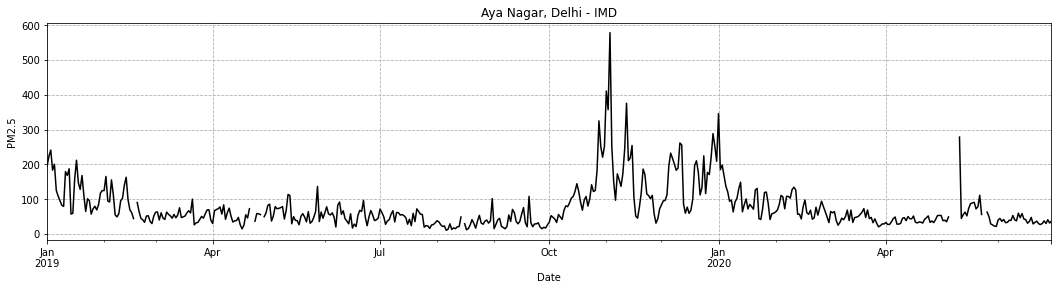

In [10]:
plt.figure(figsize=(18, 4))
df['PM2.5'].plot(c='k')
plt.title(name)
plt.ylabel('PM2.5')
plt.grid(ls='--')
plt.show()